In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Softroniics/NLP (part of AI , important for interview)/twitter_validation.csv',names=df_col)

In [11]:
df_col=["ID","Location","Target","Text"]
df.head()

,ID,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [12]:
df.isna().sum()

ID          0
Location    0
Target      0
Text        0
dtype: int64

In [13]:
df["Target"].value_counts()

Target
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

In [14]:
df.drop(df.index[(df["Target"]=="Irrelevant")],axis=0,inplace=True)
df["Target"].value_counts()

Target
Neutral     285
Positive    277
Negative    266
Name: count, dtype: int64

In [15]:
df

,ID,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [16]:
df.reset_index(drop=True,inplace=True) # droping the old index and assigning new index to that row
df

,ID,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
df.drop(["ID","Location"],axis=1,inplace=True)
df

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [18]:
df["Target"]=df["Target"].map({"Positive":1,"Negative":-1,"Neutral":0})
df

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [19]:
tweets=df.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [25]:
tweets=tweets.str.replace("[^a-zA-Z0-9]+"," ",regex=True)
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1       microsoft whi pay word function poor samsungu...
2          csgo matchmak full closet hack truli aw game 
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826           bought fraction microsoft today small win 
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [26]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer

stemmer=SnowballStemmer("english")
tk=TweetTokenizer()

In [27]:
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda y:" ".join(y))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    plea explain possibl let compani overcharg sca...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [28]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
sw=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:" ".join(x))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    plea explain possibl let compani overcharg sca...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_vec=vectorizer.fit_transform(tweets)
print(train_vec)

  (0, 735)	0.2456282916977699
  (0, 520)	0.2456282916977699
  (0, 3600)	0.19717097284763976
  (0, 879)	0.11802111433875656
  (0, 1055)	0.2456282916977699
  (0, 1185)	0.22139963227270484
  (0, 2090)	0.12503547156807654
  (0, 341)	0.2135997461023189
  (0, 908)	0.16343698819954885
  (0, 853)	0.2018385048310212
  (0, 2878)	0.2456282916977699
  (0, 608)	0.2456282916977699
  (0, 1917)	0.23145543449136263
  (0, 675)	0.2135997461023189
  (0, 411)	0.14270670271218175
  (0, 2391)	0.365996231282465
  (0, 577)	0.46291086898272527
  (1, 843)	0.4055823664694651
  (1, 3014)	0.4055823664694651
  (1, 2670)	0.3821800909185634
  (1, 1470)	0.4055823664694651
  (1, 3820)	0.36557591217188057
  (1, 2572)	0.3126902562590763
  (1, 3778)	0.26216072802580975
  (1, 2253)	0.24555654927912696
  :	:
  (825, 673)	0.22981061112100945
  (825, 1048)	0.2315686698425631
  (825, 3504)	0.21750175079084832
  (825, 3353)	0.2904718522758868
  (825, 2638)	0.17148706662740873
  (826, 1445)	0.5079831062080814
  (826, 3195)	0.4786

In [31]:
train_vec.shape

(828, 3929)

In [32]:
x=train_vec
y=df["Target"].values

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

*** MODEL BUILDING ***

In [35]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
svm_model=SVC()
nm_model=MultinomialNB()
rf_model=RandomForestClassifier()
ab_model=AdaBoostClassifier()

lst_model=[svm_model,nm_model,rf_model,ab_model]

In [36]:
lst_model=[svm_model,nm_model,rf_model,ab_model]

In [37]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [39]:
print(y_train.shape)
print(y_test.shape)

(579,)
(249,)


SVC()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.59      0.53      0.56        75
           0       0.51      0.70      0.59        84
           1       0.68      0.49      0.57        90

    accuracy                           0.57       249
   macro avg       0.59      0.57      0.57       249
weighted avg       0.59      0.57      0.57       249

****************************************************************************************************
MultinomialNB()
****************************************************************************************************
              precision    recall  f1-score   support

          -1       0.55      0.63      0.59        75
           0       0.58      0.55      0.56        84
           1       0.60      0.57      0.58        90

    accuracy                           0.58       249
   macro avg       0.5

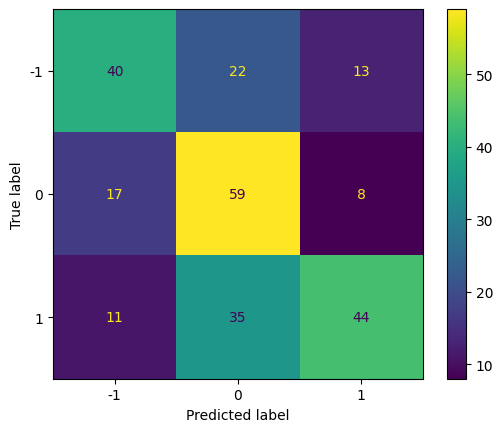

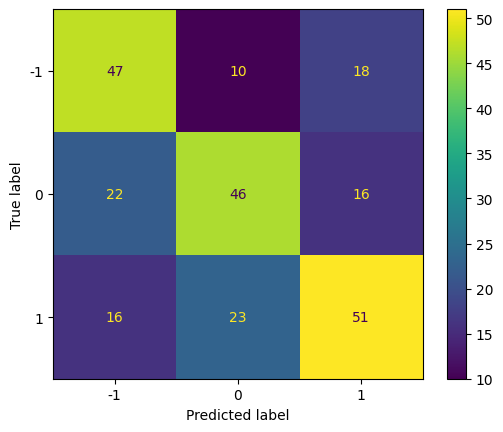

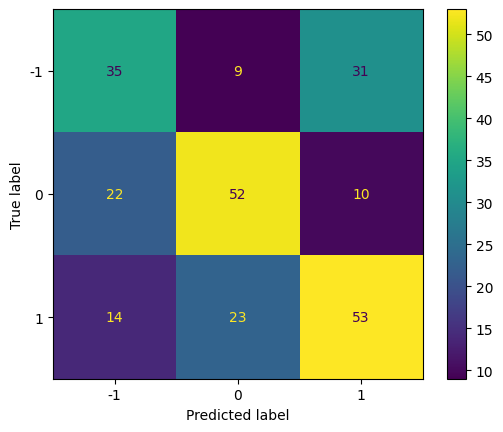

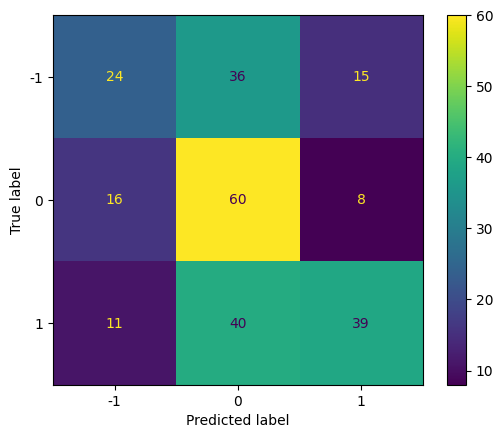

In [40]:
for i in lst_model:
  print(i)
  i.fit(x_train,y_train)
  y_predict=i.predict(x_test)
  print("*"*100)
  print(classification_report(y_test,y_predict))
  print("*"*100)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))